In [1]:
# Necessary imports
import os
import tarfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import download_data
from utils.configuration import Configuration
from utils.data_generator import DataGenerator
from utils.architectures import UNet
from utils.model import ResAttnUnet

In [2]:

gpu_physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(gpu_physical_devices) > 0:
    tf.config.experimental.set_memory_growth(gpu_physical_devices[0], True)


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))

Num GPUs Available:  1
Num CPUs Available:  1


In [3]:
configuration = Configuration()
dataset_path = configuration.get('input_images_path')
if os.path.isdir(dataset_path):
    print('Data ready')
else:
    print('dataset not ready')

Data ready


Testing and training data already generated
Here are few examples of generated data.


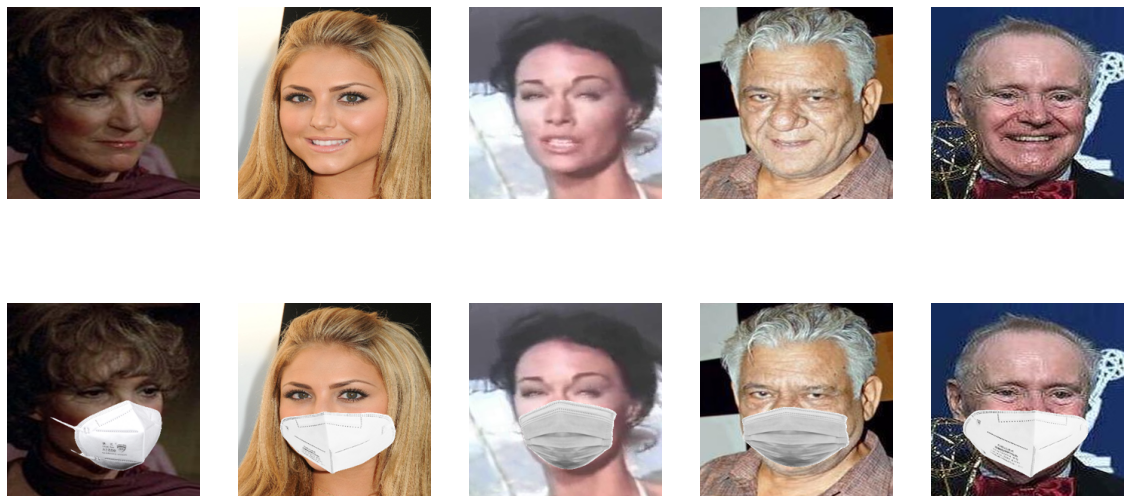

In [5]:
# setup the pipeline and generate data

dg = DataGenerator(configuration)

train_folder = configuration.get('train_data_path')
test_folder = configuration.get('test_data_path')

if os.path.exists(train_folder) and os.path.exists(test_folder):
    print('Testing and training data already generated')
else:
    dg.generate_images()

print('Here are few examples of generated data.')
n_examples = 5
inputs, outputs = dg.get_dataset_examples(n_examples)
f, axarr = plt.subplots(2, n_examples, figsize=(20, 10))
for i in range(len(inputs)):
    axarr[1, i].imshow(mpimg.imread(inputs[i]))
    axarr[1, i].axis('off')
    axarr[0, i].imshow(mpimg.imread(outputs[i]))
    axarr[0, i].axis('off')

In [6]:

filters = (64, 128, 128, 256, 256, 512)
kernels = (7, 7, 7, 3, 3, 3)
input_image_size = (256, 256, 3)
architecture = UNet.RESNET
training_epochs = 20
batch_size = 12

In [6]:

model = ResAttnUnet.build_model(architecture=architecture, input_size=input_image_size,
                                filters=filters,
                                kernels=kernels, configuration=configuration)
history = model.train(epochs=training_epochs, batch_size=batch_size, loss_function='ssim_l1_loss')




Using UNet Resnet model
Loading training data from data/train with limit of 10000 images
Loading testing data from data/test with limit of 1000 images
8/8 [==============================] - 1s 184ms/step - loss: 0.7169 - acc: 0.1362 - recall: 0.6904 - precision: 0.9899
- TEST -> LOSS:     0.7169, ACC:     0.1362, RECALL:     0.6904, PRECISION:     0.9899
Epoch 1/20
667/667 [==============================] - 782s 1s/step - loss: 0.1967 - acc: 0.8546 - recall: 0.4769 - precision: 1.0000 - val_loss: 0.1342 - val_acc: 0.8808 - val_recall: 0.4555 - val_precision: 0.9997
Epoch 2/20
667/667 [==============================] - 785s 1s/step - loss: 0.1024 - acc: 0.9060 - recall: 0.4080 - precision: 1.0000 - val_loss: 0.0932 - val_acc: 0.9296 - val_recall: 0.4203 - val_precision: 0.9999
Epoch 3/20
667/667 [==============================] - 786s 1s/step - loss: 0.0862 - acc: 0.9103 - recall: 0.4030 - precision: 1.0000 - val_loss: 0.0849 - val_acc: 0.9047 - val_recall: 0.3627 - val_precision: 1.000

<class 'NoneType'>


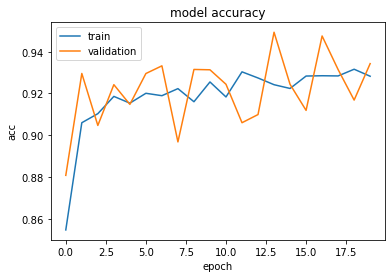

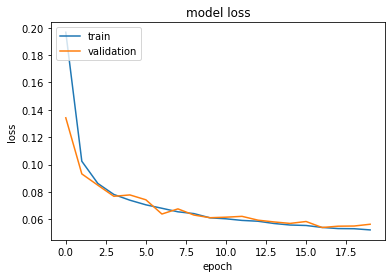

In [7]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('modelAccuracy.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('modelLoss.png')
plt.show()

In [9]:
#model = ResAttnUnet.load_model('model_saved/models/model.h5')

In [10]:
with open(".\\trainHistoryDict", "wb") as file_pi:
    pickle.dump(history.history, file_pi)

PermissionError: [Errno 13] Permission denied: '.\\trainHistoryDict'

In [31]:
np.save('my_history.npy',history.history)

In [41]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()

In [48]:
print(history.history)

AttributeError: 'dict' object has no attribute 'history'

In [49]:
import pandas as pd

   
hist_df = pd.DataFrame(history.history) 

  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)


hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

AttributeError: 'dict' object has no attribute 'history'

In [10]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 256, 256, 64) 9472        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 128, 128, 64) 200768      conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 128, 128, 64) 200768      conv2d_13[0][0]                  
____________________________________________________________________________________________

#result

(234, 254)
(256, 256)
(256, 256)
(250, 256)
(221, 256)
Generated Results.


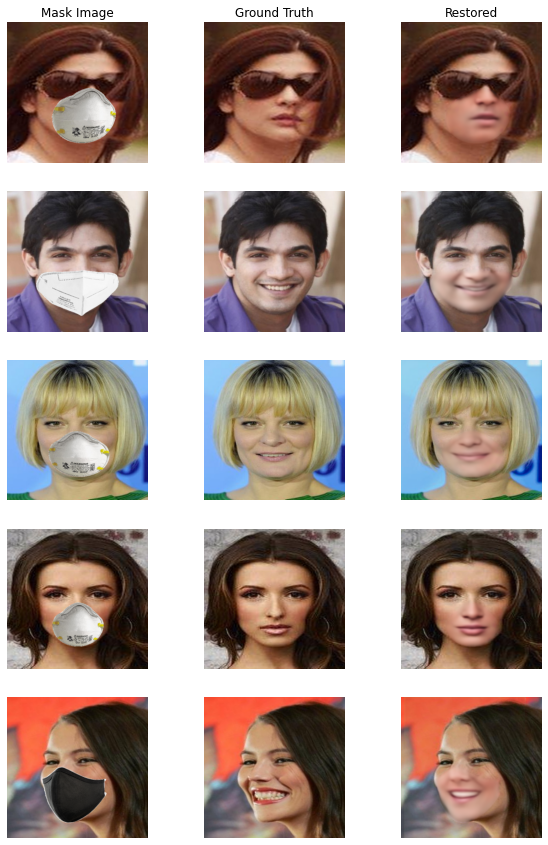

In [15]:

n_examples = 5
input_imgs, true_output_imgs = dg.get_dataset_examples(n_examples, test_dataset=False)
f, axarr = plt.subplots(n_examples, 3, figsize=(10, n_examples * 3))
for i, img in enumerate(input_imgs):
    generated_output = model.predict(img)
    axarr[i, 0].imshow(mpimg.imread(input_imgs[i]))
    axarr[i, 0].axis('off')
    axarr[i, 1].imshow(mpimg.imread(true_output_imgs[i]))
    axarr[i, 1].axis('off')
    axarr[i, 2].imshow(generated_output)
    axarr[i, 2].axis('off')

axarr[0, 0].set_title('Mask Image')
axarr[0, 1].set_title('Ground Truth')
axarr[0, 2].set_title('Restored')
print('Generated Results.')

In [ ]:
#### FindoutSSIM and PSNR

In [17]:
import cv2
import numpy as np

(234, 254)
(256, 256)
(256, 256)
(250, 256)
(221, 256)
Generated Results.


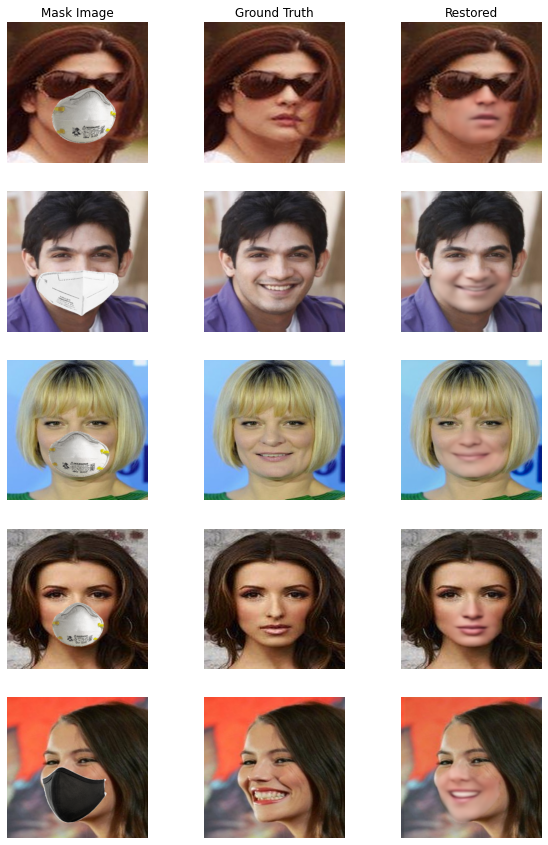

In [18]:
n_examples = 5
#input_imgs, true_output_imgs = dg.get_dataset_examples(n_examples, test_dataset=False)
f, axarr = plt.subplots(n_examples, 3, figsize=(10, n_examples * 3))
for i, img in enumerate(input_imgs):
    generated_output = model.predict(img)
    axarr[i, 0].imshow(mpimg.imread(input_imgs[i]))
    axarr[i, 0].axis('off')
    axarr[i, 1].imshow(mpimg.imread(true_output_imgs[i]))
    axarr[i, 1].axis('off')
    axarr[i, 2].imshow(generated_output)
    axarr[i, 2].axis('off')
    #Image.open(input_imgs[i]).save('input_'+str(i)+'.png')
    #Image.open(true_output_imgs[i]).save('groundTruth_'+str(i)+'.png')
    #cv2.imwrite(str(i),generated_output)
    #print(type(input_imgs[i]))
    #img.save('input_'+str(i)+'.jpg')
    #cv2.imwrite('a',np.array(true_output_imgs[i]))
    #np.array(true_output_imgs[i]).save('groundTruth_'+str(i)+'.jpg')
    generated_output.save('generated_'+str(i)+'.png')

axarr[0, 0].set_title('Mask Image')
axarr[0, 1].set_title('Ground Truth')
axarr[0, 2].set_title('Restored')
print('Generated Results.')

In [ ]:
print(len(input_imgs))

In [13]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): # MSE is zero means no noise is present in the signal .
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
    original = cv2.imread("gan unmasking/groundTruth_4.png")
    compressed = cv2.imread("gan unmasking/4.png", 1)
    value = PSNR(original, compressed)
    print(f"PSNR value is {value} dB")
    
if __name__ == "__main__":
    main()

PSNR value is 30.45338483908532 dB


In [ ]:
print(ssim1)

In [ ]:
#img1 = Image.open(input_imgs[0])

In [ ]:
#Image.open(input_imgs[0]).save('kk2.png')

In [21]:
def compute_ssim_loss( x, y):
        """Computes a differentiable structured image similarity measure."""
        c1 = 0.01**2
        c2 = 0.03**2
        mu_x = slim.avg_pool2d(x, 3, 1, 'VALID')
        mu_y = slim.avg_pool2d(y, 3, 1, 'VALID')
        sigma_x = slim.avg_pool2d(x**2, 3, 1, 'VALID') - mu_x**2
        sigma_y = slim.avg_pool2d(y**2, 3, 1, 'VALID') - mu_y**2
        sigma_xy = slim.avg_pool2d(x * y, 3, 1, 'VALID') - mu_x * mu_y
        ssim_n = (2 * mu_x * mu_y + c1) * (2 * sigma_xy + c2)
        ssim_d = (mu_x**2 + mu_y**2 + c1) * (sigma_x + sigma_y + c2)
        ssim = ssim_n / ssim_d
        return tf.clip_by_value((1 - ssim) / 2, 0, 1)

In [22]:
x = cv2.imread("gan unmasking/groundTruth_4.png")
y = cv2.imread("gan unmasking/4.png")

In [23]:
compute_ssim_loss( x, y)

NameError: name 'slim' is not defined